<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Ramsey" data-toc-modified-id="Ramsey-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ramsey</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Find-steady-state" data-toc-modified-id="Find-steady-state-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Find steady state</a></span></li><li><span><a href="#Find-initial-consumption-on-saddlepath" data-toc-modified-id="Find-initial-consumption-on-saddlepath-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Find initial consumption on saddlepath</a></span></li></ul></li><li><span><a href="#Phase-diagram" data-toc-modified-id="Phase-diagram-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Phase diagram</a></span></li><li><span><a href="#Time-profiles" data-toc-modified-id="Time-profiles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time profiles</a></span></li><li><span><a href="#Diverging-Paths" data-toc-modified-id="Diverging-Paths-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Diverging Paths</a></span></li><li><span><a href="#Interactive-phase-diagram" data-toc-modified-id="Interactive-phase-diagram-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interactive phase diagram</a></span></li></ul></div>

**Description:** This is a Jupyter Notebook with Python code. You do not need any knowledge or either Jupyter or Python to run it.

**To run all:** Kernel $\rightarrow$ Restart & Run All

**To run each cell press:**

1. <kbd>Ctrl</kbd>+<kbd>Enter</kbd> to just run the cell
2. <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Enter</kbd> to the run the cell and proceed to the next

# Setup

In [1]:
# import and settings
%matplotlib inline
%load_ext autoreload
%autoreload 1

import matplotlib.pyplot as plt

import context
import numecon.course_macro3.ramsey as ramsey
%aimport numecon.course_macro3.ramsey

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:5000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

# Ramsey

## Setup

Make a dictionary called **par** with your parameter choices.

In [3]:
par = dict()
par['beta'] = 0.96
par['sigma'] = 2
par['delta'] = 0.10
par['alpha'] = 1/3
par['k0'] = 1
par['tau'] = 1e-6

Create a **Ramsey model** with the chosen parameters.

In [4]:
model = ramsey.RamseyModel(name='baseline',**par)

## Find steady state

In [5]:
model.find_steady_state()

k_ss = 3.6092
c_ss = 1.1730
r_ss = 0.0417
w_ss = 1.0226


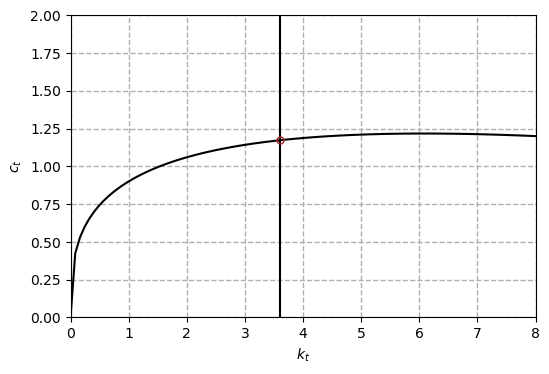

In [6]:
# a. setup figure
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

# b. plot loci
model.plot_loci(ax)

# c. plot steady state
model.plot_steady_state(ax,marker='o',markersize=5,markerfacecolor='none',color='firebrick')

## Find initial consumption on saddlepath

In [7]:
model.find_c0_on_saddlepath()

c0 = 0.7014


Plot **algorithm behavior**.

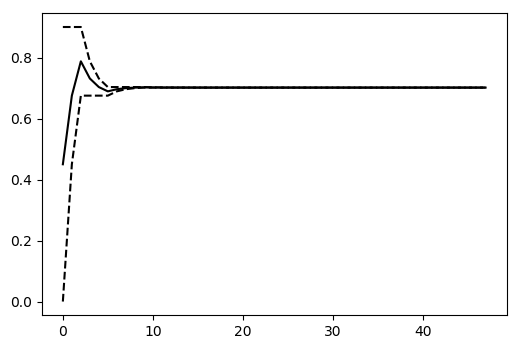

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(model.c0_path,'-',color='black')
ax.plot(model.c_high_path,'--',color='black')
ax.plot(model.c_low_path,'--',color='black');

# Phase diagram

Plot the **phase diagram** with the **loci** and the **transition path**.

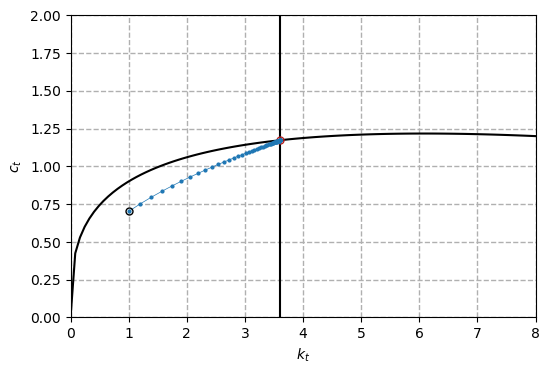

In [9]:
# a. setup figure
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

# b. plot loci
model.plot_loci(ax)

# c. plot steady state
model.plot_steady_state(ax,marker='o',markersize=5,markerfacecolor='none',color='firebrick')

# d. plot transition path
model.simulate()
model.plot_kc_path(ax)
c0 = model.optimal_initial_consumption_level()
ax.plot(model.k0,c0,marker='o',markersize=5,markerfacecolor='none',color='black')

fig.savefig('phase_diagram.pdf')

# Time profiles

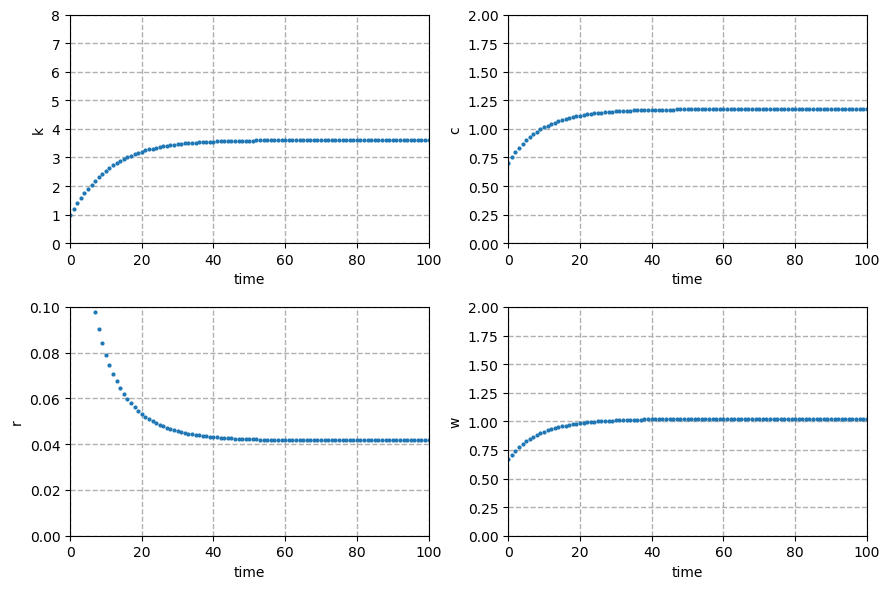

In [10]:
varnames = ['k','c','r','w']
ymaxs = [model.k_max,model.c_max,0.10,2]

fig = plt.figure(figsize=(9,6),dpi=100)
for i,(varname,ymax) in enumerate(zip(varnames,ymaxs)):
        
    ax = fig.add_subplot(2,2,i+1)

    model.plot_sim_time(ax,varname)

    ax.grid(ls='--',lw=1)
    ax.set_xlim([0,100])
    ax.set_ylim([0,ymax])
    ax.set_xlabel('time')
    ax.set_ylabel(f'{varname}')

plt.tight_layout()

fig.savefig('time_profiles.pdf')

# Diverging Paths

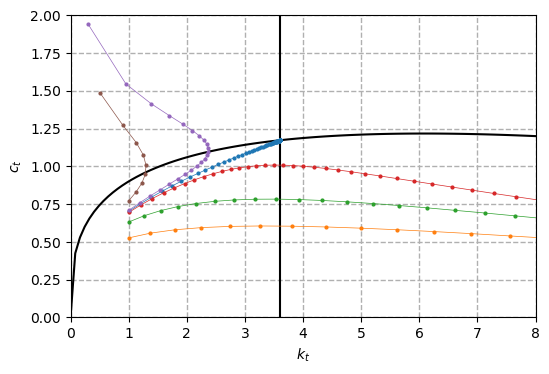

In [11]:
# a. setup figure
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1) 

# b. plot loci
model.plot_loci(ax)

# d. plot transition path
model.simulate()
model.plot_kc_path(ax)

# e. alternative initial consumption
for c0_fac in [0.75,0.9,0.99,1.01,1.1]:
    model.simulate(c0=model.c0*c0_fac)
    model.plot_kc_path(ax)

fig.savefig('diverging_paths.pdf')

# Interactive phase diagram

In [12]:
ramsey.interactive_phase_diagram()

interactive(children=(FloatSlider(value=0.97, continuous_update=False, description='$\\beta$', max=0.99, min=0…